<a href="https://www.kaggle.com/choureymanas/fotune-companies-analysis?scriptVersionId=85890923" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fortune-global-2000-companies-till-2021/fortune_2000_in_2021.csv


Welcome to my notebook, please give and upvote if you like it and feel free to share any feedback in the comments.In this notebook we are going to analyze fortune companies dataset using different visualizations 

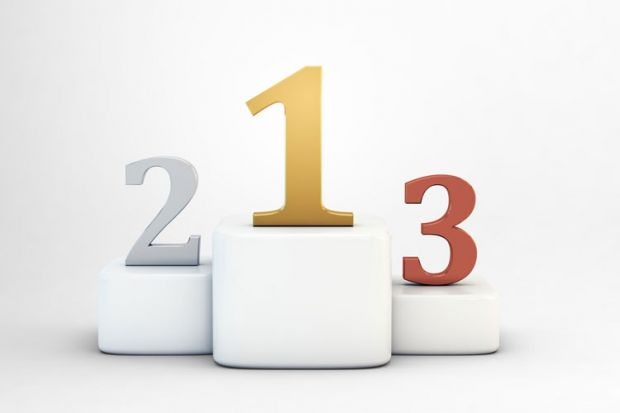

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/fortune-global-2000-companies-till-2021/fortune_2000_in_2021.csv")

In [4]:
df= df.dropna(axis=0)
df.isnull().sum()

Rank            0
Name            0
Country         0
Sales           0
Profit          0
Assets          0
Market Value    0
dtype: int64

In [5]:
#Looking at the data
df.shape

(1999, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          1999 non-null   int64 
 1   Name          1999 non-null   object
 2   Country       1999 non-null   object
 3   Sales         1999 non-null   object
 4   Profit        1999 non-null   object
 5   Assets        1999 non-null   object
 6   Market Value  1999 non-null   object
dtypes: int64(1), object(6)
memory usage: 124.9+ KB


In [7]:
import re
def cleaning(text):
    text =str(text).replace("$","")
    text =str(text).replace("B","")
    text =str(text).replace(",","")
    if("M" in text):
        text =str(text).replace("M","")
        text =str(float(text)/1000)
    return text

def country_name(text):
    text =str(text).replace("United Arab Emirates","UAE")
    text =str(text).replace("United States","US")
    text =str(text).replace("United Kingdom","UK")
    text =str(text).replace("Czech Republic","CR")
    return text

In [8]:
for columns in ['Sales','Profit','Assets','Market Value']:
    df[columns]= df[columns].apply(lambda x:cleaning(x)).astype(float)
    
df['Country']= df['Country'].apply(lambda x:country_name(x))

In [9]:
#Checking null values
df.isnull().sum()

Rank            0
Name            0
Country         0
Sales           0
Profit          0
Assets          0
Market Value    0
dtype: int64

In [10]:
#Dropping na value
df= df.dropna()

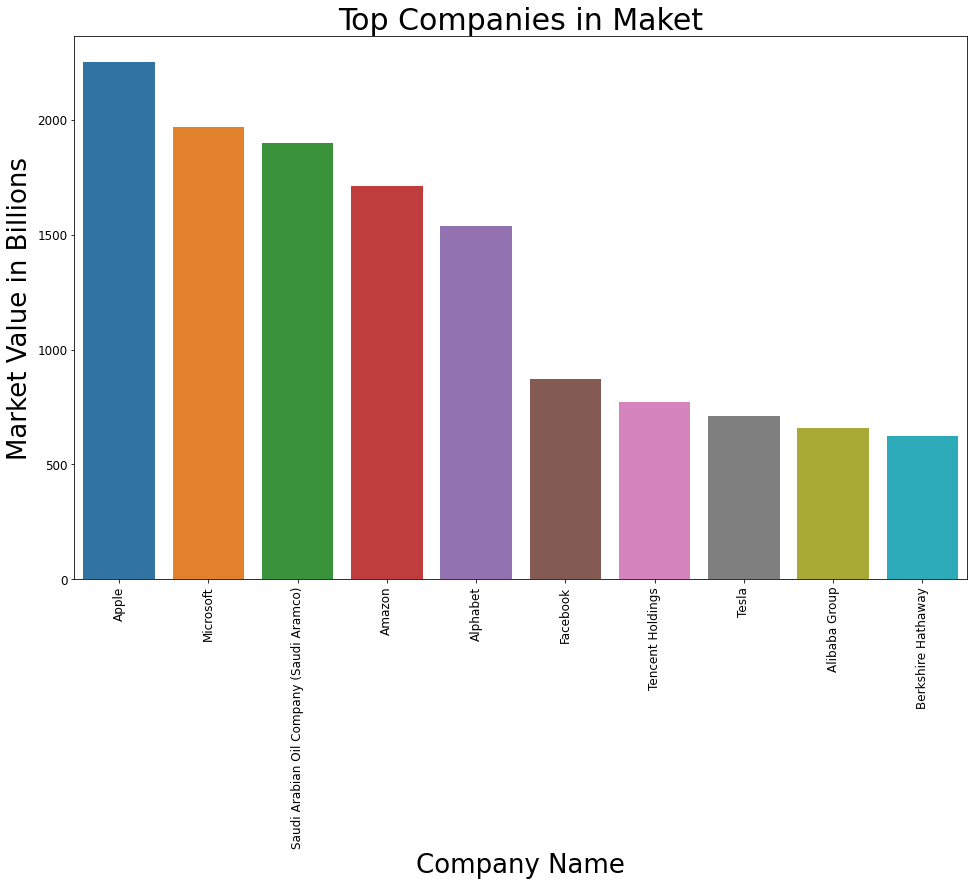

In [11]:
#Top companies
plt.figure(figsize=(16,10))
sns.barplot(x='Name',y='Market Value',data=df.sort_values(by=['Market Value'],ascending=False).head(10))
plt.xticks(rotation =90,fontsize=12)
plt.yticks(fontsize=12)
plt.title("Top Companies in Maket",fontsize=30)
plt.xlabel('Company Name',fontsize=26)
plt.ylabel('Market Value in Billions',fontsize=26)
plt.show()


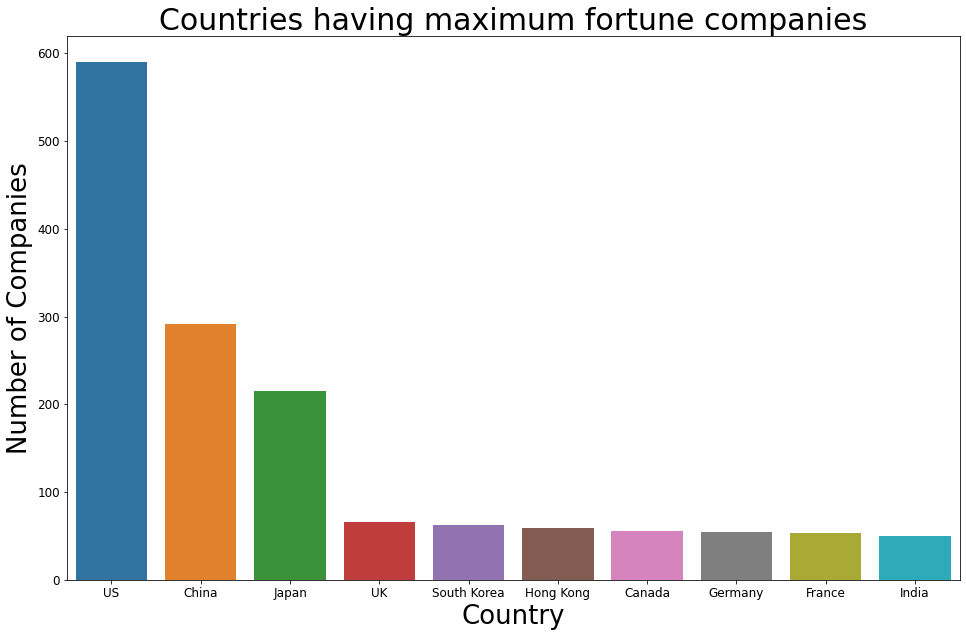

In [12]:
#Countries with most fortune companies
df_Country = df[['Country','Name']].groupby(by=['Country'],as_index=False).count()
df_Country.rename(columns={'Name':'Number of Companies'},inplace = True)
df_Country.sort_values(by=['Number of Companies'],inplace = True,ascending=False )
plt.figure(figsize=(16,10))
sns.barplot(x='Country',y='Number of Companies',data=df_Country.head(10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Countries having maximum fortune companies",fontsize=30)
plt.xlabel('Country',fontsize=26)
plt.ylabel('Number of Companies',fontsize=26)
plt.show()

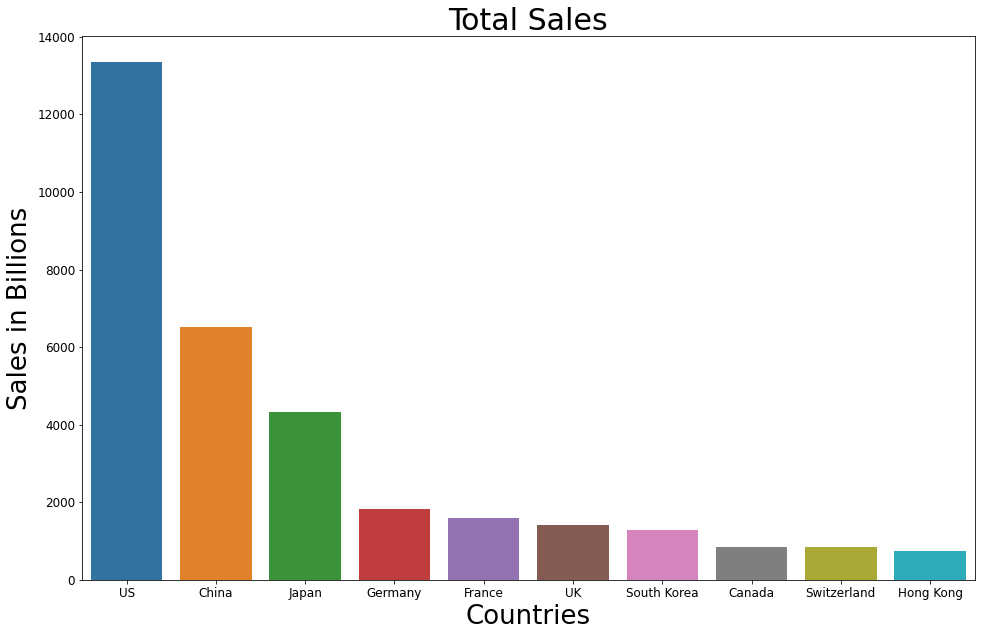

In [13]:
df_Country = df[['Country','Sales']].groupby(by=['Country'],as_index=False).sum()
df_Country.rename(columns={'Sales':'Total Sales'},inplace = True)
df_Country.sort_values(by=['Total Sales'],inplace = True,ascending=False )
plt.figure(figsize=(16,10))
sns.barplot(x='Country',y='Total Sales',data=df_Country.head(10))
plt.title("Total Sales",fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Countries",fontsize=26)
plt.ylabel("Sales in Billions",fontsize=26)
plt.show()

In [14]:
df.head()

,Rank,Name,Country,Sales,Profit,Assets,Market Value
0,1,ICBC,China,190.5,45.8,4914.7,249.5
1,2,JPMorgan Chase,US,136.2,40.4,3689.3,464.8
2,3,Berkshire Hathaway,US,245.5,42.5,873.7,624.4
3,4,China Construction Bank,China,173.5,39.3,4301.7,210.4
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.7,49.3,510.3,1897.2


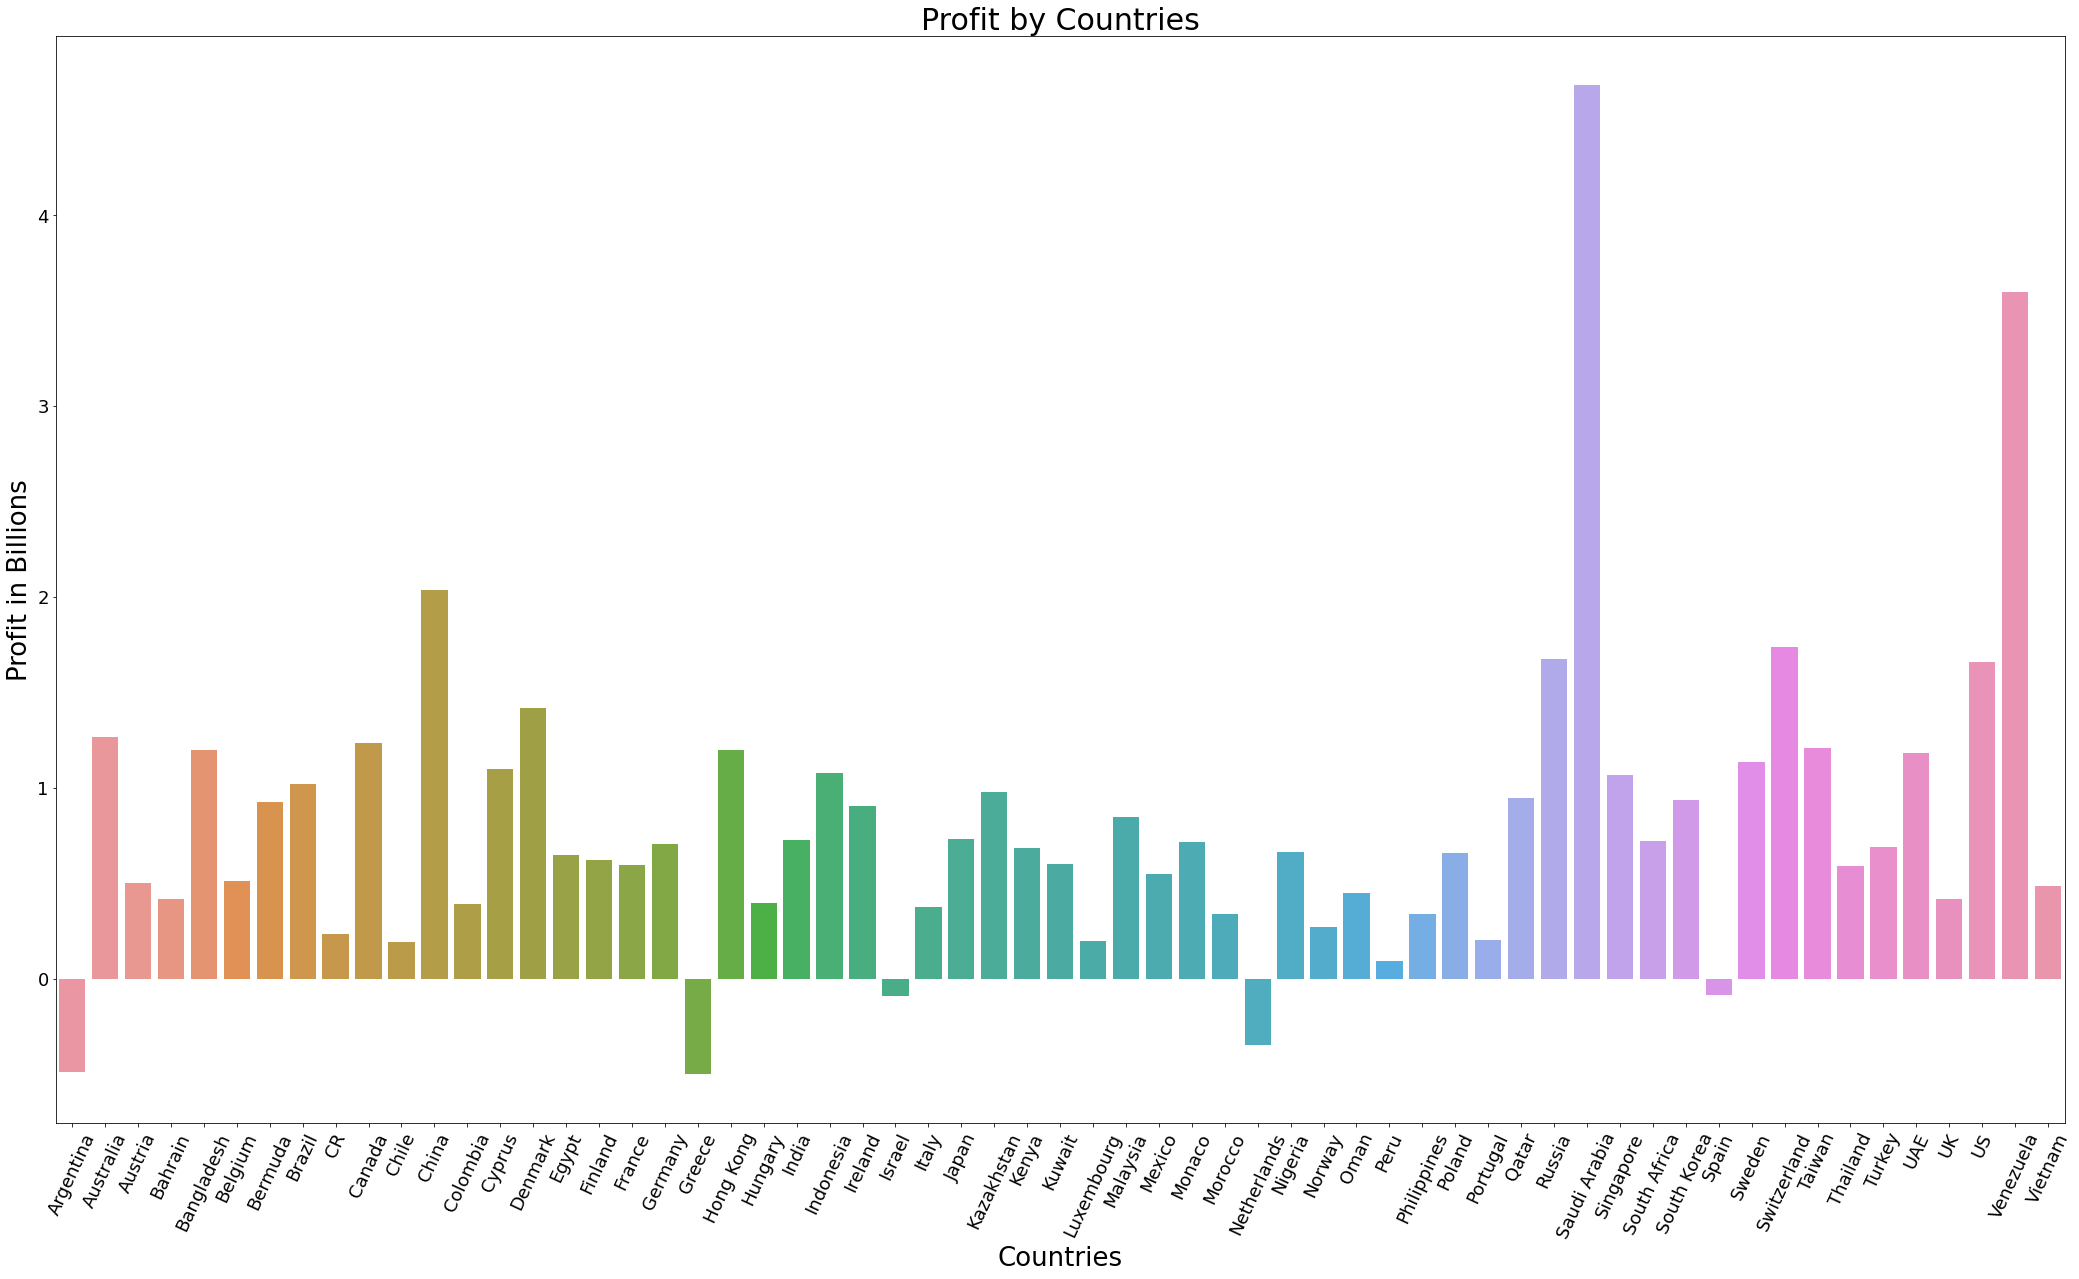

In [15]:
plt.figure(figsize=(36,20))
sns.barplot(x='Country',y='Profit',data = df[['Country','Profit']].groupby(by=['Country'],as_index=False).mean())
plt.title("Profit by Countries",fontsize=30)
plt.xticks(rotation = 65,fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Countries",fontsize=26)
plt.ylabel("Profit in Billions",fontsize=26)
plt.show()